In [2]:
import pandas as pd

In [3]:
time_paths = {
    "spot-rna":"/home/macieka/2d-prediction/SPOT-RNA/time.txt",
    "mxfold":"/home/macieka/2d-prediction/mxfold/predictions/time.txt",
    "mxfold2":"/home/macieka/2d-prediction/mxfold2/time.txt",
    "contextfold":"/home/macieka/2d-prediction/ContextFold_1_00/tail-time.txt",
    "contrafold":"/home/macieka/2d-prediction/contrafold/predictions/time.txt",
    "rna-state-inf":"/home/macieka/2d-prediction/rna-state-inf/tail-time.txt",
    "ufold":"/home/macieka/2d-prediction/UFold/tail-time.txt",
    "e2efold":"/home/macieka/2d-prediction/e2efold/e2efold_productive/time.txt"    
}

In [4]:
method_times = {}
for n, tf in time_paths.items():
    with open(tf) as f:
        times = f.readlines()[-3:-2]
    method_times[n]=times[0]
print(method_times)

{'spot-rna': 'real\t19m52.341s\n', 'mxfold': 'real\t2m44.149s\n', 'mxfold2': 'real\t126m12.052s\n', 'contextfold': 'real\t29m21.005s\n', 'contrafold': 'real\t2m29.984s\n', 'rna-state-inf': 'real\t826m18.861s\n', 'ufold': 'real\t18m8.379s\n', 'e2efold': 'real\t2m36.520s\n'}


In [5]:
import numpy as np
sec_times = []
for m, v in method_times.items():
    t_val = v.replace("real\t", "").strip()
    t_val = t_val.split("m")
    t_val[0] = int(t_val[0])
    t_val[1] = float(t_val[1].replace('s',''))
    sec_time = float(t_val[0]*60 + t_val[1])
    sec_times.append([m, sec_time])
    print(m, sec_time)
sec_times = np.array(sec_times)

spot-rna 1192.341
mxfold 164.149
mxfold2 7572.052
contextfold 1761.005
contrafold 149.984
rna-state-inf 49578.861
ufold 1088.379
e2efold 156.52


In [6]:
df = pd.DataFrame(sec_times[:,1].astype("float16"), index=sec_times[:, 0]).sort_values(by=0)
df

,0
contrafold,150.000
e2efold,156.500
mxfold,164.125
ufold,1088.000
spot-rna,1192.000
contextfold,1761.000
mxfold2,7572.000
rna-state-inf,49568.000


In [9]:
vals = [float(v) for v in df[0].values[:-1]]

<BarContainer object of 7 artists>

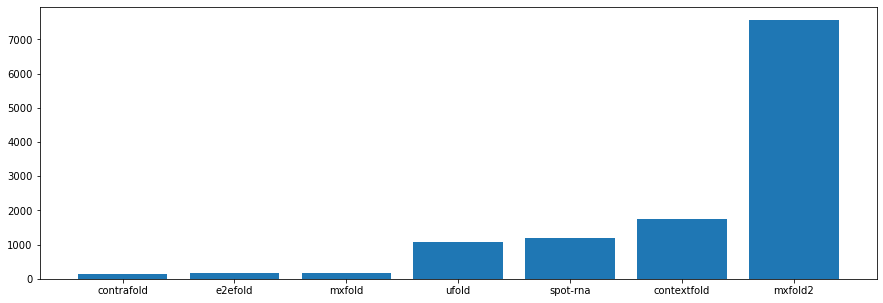

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.bar(df.index[:-1], vals)